# Data Science QUESTION 2

  
You'll be asked to do some analysis and modeling tasks on a dataset created.  
The dataset concerns a video gaming company that has information on its customers and would like to gain more insights on what drives their customers to play for longer hours.  

The following tables are provided:

In [1]:
import pandas as pd

In [2]:
df_districts_house_prices = pd.read_csv("df_districts_house_prices.csv")
df_person_data = pd.read_csv("df_person_data.csv")
df_person_district = pd.read_csv("df_person_district.csv")

df_person_district

includes information about each customer (person) and the district they live in

- person_id: the person id
- district: the name of the district

In [3]:
df_person_district

,person_id,district
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone
1,16f3bafb-9556-434e-adab-cb02f41fe32a,Tashnerspool
2,0fa17eee-7214-4609-97fe-dd3093601800,Tashnerspool
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,Ulven
4,51fed64a-375e-417f-94e4-4d27c368ea44,Red Onvey
...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,Bluffssel
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,Highnantmar
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,Tashnerspool
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,Highnantmar


df_districts_house_prices

includes information about each district and the prices of the houses in the district

- district: the name of the district
- house_price: the price of the house
- house_number: the house number in the district

In [4]:
df_districts_house_prices

,district,house_price,house_number
0,Celowsgan,160652.0,1
1,Celowsgan,159219.0,2
2,Celowsgan,161543.0,3
3,Celowsgan,158944.0,4
4,Celowsgan,164121.0,5
...,...,...,...
1358,El Willong,932441.0,30
1359,El Willong,890190.0,31
1360,El Willong,892096.0,32
1361,El Willong,935117.0,33


df_person_data

includes personal information about each of the customers and relevant information to their video gaming habits

- person_id: identifier for a person
- age: the age of the person
- n_kids: the number of kids this person has
- n_vg: the number of video games the person owns
- n_con: the number of video game consols the person owns
- n_presub: the number of premium subscription the person owns
- n_hours_playing: the total number of hours this person play per month 

In [5]:
df_person_data

,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745
1,16f3bafb-9556-434e-adab-cb02f41fe32a,18.0,0,2,0,0,20.693273
2,0fa17eee-7214-4609-97fe-dd3093601800,28.0,0,3,0,0,22.412490
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,20.0,1,72,0,0,299.187025
4,51fed64a-375e-417f-94e4-4d27c368ea44,32.0,1,58,1,3,20.367141
...,...,...,...,...,...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,32.0,4,62,1,2,21.378288
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,36.0,0,53,1,1,3.707476
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,19.0,0,1,1,0,23.809075
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,31.0,2,49,3,2,15.708397


## Quick EDA

The goals of these questions is to evaluate your plotting, data mangling, and plot interpretation skills.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   

### 1. Plot each district's house prices distribution with marking the mean by a vertical line


In [6]:
 df_dist = df_districts_house_prices.groupby('district').mean()

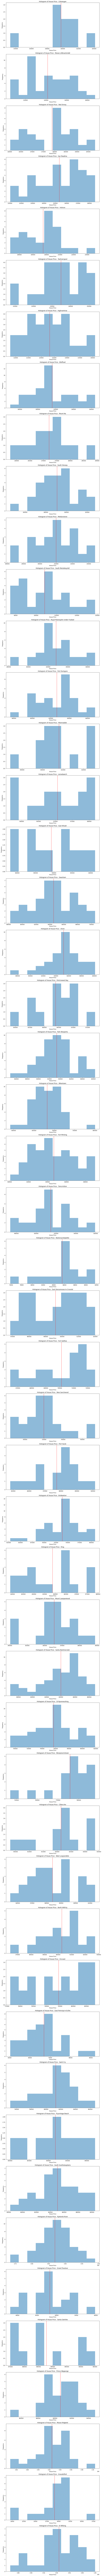

In [7]:
import matplotlib.pyplot as plt

districts = df_districts_house_prices['district'].unique()

# Create subplots for each district
fig, axes = plt.subplots(len(districts), 1, figsize=(12, 6 * len(districts)))

for i, district in enumerate(districts):
    # Filter the data for the current district
    district_data = df_districts_house_prices[df_districts_house_prices['district'] == district]
    
    mean_price = district_data['house_price'].mean()

    # Plot histogram for house_price
    ax1 = axes[i]
    ax1.hist(district_data['house_price'], bins=10, alpha=0.5)
    ax1.axvline(mean_price, color='red', linestyle='--', label='Mean')
    ax1.set_title(f'Histogram of House Price - {district}')
    ax1.set_xlabel('House Price')
    ax1.set_ylabel('Frequency')


# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

### 2. Combine all of the three data sources into one table to use in further analysis. 

In [8]:
df_merged = df_person_district.merge(df_person_data,on='person_id')
df_all_data = df_merged.merge(df_dist,on='district')
df_all_data

,person_id,district,age,n_kids,n_vg,n_con,n_presub,n_hours_playing,house_price,house_number
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,14.0,0,0,0,0,18.422745,309970.916667,13.0
1,1507aa29-0970-4393-8e16-0c6195c8bfb6,Metdunstone,15.0,0,3,0,0,28.297143,309970.916667,13.0
2,7b67cdcc-2b7b-46de-a1f9-0e16cf059da2,Metdunstone,19.0,0,0,1,0,23.780282,309970.916667,13.0
3,536a6888-d8fa-460f-a5e5-abe2bf75e037,Metdunstone,18.0,0,2,0,0,24.129812,309970.916667,13.0
4,5a4550c6-0c92-458a-bbe0-8fe653e81fdc,Metdunstone,23.0,0,3,0,0,27.396962,309970.916667,13.0
...,...,...,...,...,...,...,...,...,...,...
69995,e910641d-f9ac-43a7-ae2e-02e788820202,Gravekitfort,36.0,4,48,4,3,3.765111,29124.100000,10.5
69996,7444eed6-960a-45f9-89c4-813665619217,Gravekitfort,32.0,2,50,2,3,15.029205,29124.100000,10.5
69997,ac2aa682-489a-4fa2-9413-30de9c219a43,Gravekitfort,24.0,0,1,0,1,7.160231,29124.100000,10.5
69998,c734e5da-bdc7-47b4-bab5-4bfa0542ff82,El Willong,17.0,1,63,2,6,438.605247,943776.294118,17.5


### 3. Plot age vs avg house price. What does this plot tell you? (younger people live in more expensive districts)

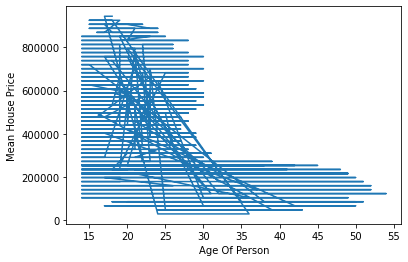

In [9]:


plt.plot(df_all_data['age'],df_all_data['house_price'])


plt.xlabel("Age Of Person")
plt.ylabel("Mean House Price")

plt.show()

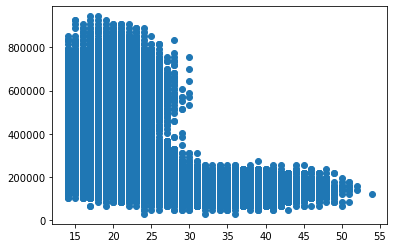

In [263]:
x=df_all_data['age']
y=df_all_data['house_price']
plt.scatter(x,y)

In [10]:
# Yes the above plot shows that the highest house price values lies for people age less then 25 means the younger people

## Probability and Statistics:

The goal of these questions is to test your ability to answer probability and stat questions with code.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   


### 1. What's the probability of a customer having 2 kids

In [11]:
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   person_id        70000 non-null  object 
 1   district         70000 non-null  object 
 2   age              69990 non-null  float64
 3   n_kids           70000 non-null  int64  
 4   n_vg             70000 non-null  int64  
 5   n_con            70000 non-null  int64  
 6   n_presub         70000 non-null  int64  
 7   n_hours_playing  70000 non-null  float64
 8   house_price      70000 non-null  float64
 9   house_number     70000 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 5.9+ MB


In [12]:
total_person_with_2_kids = df_all_data[df_all_data['n_kids'] == 2]['n_kids'].count()
total_values = df_all_data.count()
prob_having_2_kids = total_person_with_2_kids / total_values
prob_having_2_kids[0]

0.10017142857142858

### 2. What's the probability of a customer owning more than 10 video games given that they have less than 2 kids

In [13]:
cust_10_more_games = df_all_data.loc[(df_all_data['n_kids'] < 2) & (df_all_data['n_vg'] > 10)]['person_id'].count()
total_values = df_all_data.count()
prob_customer = cust_10_more_games/total_values
prob_customer[0]

0.2876

### 3. Plot the distribution of the number of hours played by customers `n_hours_playing`. Briefly explain what you understand now about the customers' playing hours.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7d2ca5b130>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7d2ca5b730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7d2ca4ad60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7d2ca5be50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7d2ca695b0>],
 'means': [<matplotlib.lines.Line2D at 0x7f7d2ca69220>]}

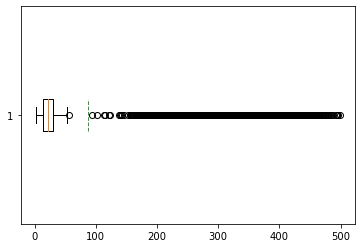

In [14]:
plt.boxplot(df_all_data['n_hours_playing'],vert = 0,showmeans= True,meanline= True,showcaps= True)


#### Plotting Normal Distribution

In [15]:
import statistics
from scipy.stats import norm

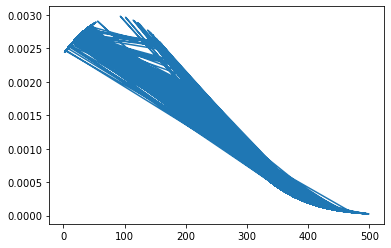

In [16]:
x_axis = df_all_data['n_hours_playing']
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

#### Now Removing Values Less Then 50

In [17]:
x_axis = df_all_data[df_all_data['n_hours_playing'] < 50]
x_axis

,person_id,district,age,n_kids,n_vg,n_con,n_presub,n_hours_playing,house_price,house_number
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,14.0,0,0,0,0,18.422745,309970.916667,13.0
1,1507aa29-0970-4393-8e16-0c6195c8bfb6,Metdunstone,15.0,0,3,0,0,28.297143,309970.916667,13.0
2,7b67cdcc-2b7b-46de-a1f9-0e16cf059da2,Metdunstone,19.0,0,0,1,0,23.780282,309970.916667,13.0
3,536a6888-d8fa-460f-a5e5-abe2bf75e037,Metdunstone,18.0,0,2,0,0,24.129812,309970.916667,13.0
4,5a4550c6-0c92-458a-bbe0-8fe653e81fdc,Metdunstone,23.0,0,3,0,0,27.396962,309970.916667,13.0
...,...,...,...,...,...,...,...,...,...,...
69818,ed8e7ae0-a539-4edb-96dc-6fd92680eb74,East Pomrsip-In-Ecthe,31.0,3,45,1,3,15.175508,66905.281250,16.5
69819,1949d5fe-0088-45f4-80d7-cffac8613243,East Pomrsip-In-Ecthe,30.0,0,71,3,2,24.030853,66905.281250,16.5
69995,e910641d-f9ac-43a7-ae2e-02e788820202,Gravekitfort,36.0,4,48,4,3,3.765111,29124.100000,10.5
69996,7444eed6-960a-45f9-89c4-813665619217,Gravekitfort,32.0,2,50,2,3,15.029205,29124.100000,10.5


#### Now Again Plotting Normal Distribution

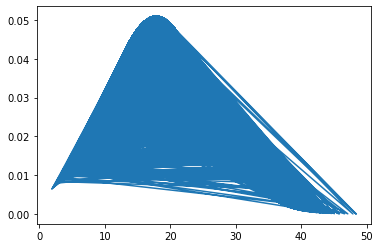

In [18]:
value_for_norm = x_axis['n_hours_playing']
# Calculating mean and standard deviation
mean = statistics.mean(value_for_norm)
sd = statistics.stdev(value_for_norm)
  
plt.plot(value_for_norm, norm.pdf(value_for_norm, mean, sd))
plt.show()

As you can see, most customers have a number of hours less than 50 so let's go ahead and remove any values less than 50.  
The distribution of the remaining values look like a normal distribution.  
###  4. Estimate the parameters (mean and std deviation) of this normal distribution computationally.  \
### (Bonus: plot the estimated normal distribution on top of the distribution of `n_hours_playing` after removing values < 50)

In [19]:
value_for_norm = x_axis['n_hours_playing']
# Calculating mean and standard deviation
mean = statistics.mean(value_for_norm)
std = statistics.stdev(value_for_norm)
print('The Mean is ',mean)
print('The Standard Deviation is',std)

The Mean is  17.85123344538773
The Standard Deviation is 7.832911184639036


No handles with labels found to put in legend.


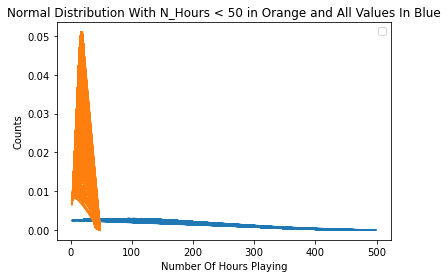

In [20]:
value_less_50 = df_all_data[df_all_data['n_hours_playing'] < 50]
x_axis = df_all_data['n_hours_playing']
  
# Calculating mean and standard deviation
meanN = statistics.mean(x_axis)
sdN = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, meanN, sdN))

value_for_norm = value_less_50['n_hours_playing']

# Calculating mean and standard deviation
mean = statistics.mean(value_for_norm)
sd = statistics.stdev(value_for_norm)
  
plt.plot(value_for_norm, norm.pdf(value_for_norm, mean, sd))

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number Of Hours Playing")
plt.ylabel("Counts")
plt.title("Normal Distribution With N_Hours < 50 in Orange and All Values In Blue")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

# Modeling
The goal of this is to showcase your experimentation and model comparison process.  
The performance of models is not as important as how you compare them and evaluate them against each other.  

Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   
# Apply Different regression model 
# Apply two classffier Model for the data of classfication ( as per your choice)

### 1. Model the number of hours played for each customer. Show your experimentation with failed and successful models.
### 2. Evaluate each experiment using appropriate metrics, cross validation, and plots. Show the predicted vs actual plot.
### 3. Choose the best model for the data

##### Applying The Linear Regression Model On The Data

In [21]:
df_all_data

,person_id,district,age,n_kids,n_vg,n_con,n_presub,n_hours_playing,house_price,house_number
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,14.0,0,0,0,0,18.422745,309970.916667,13.0
1,1507aa29-0970-4393-8e16-0c6195c8bfb6,Metdunstone,15.0,0,3,0,0,28.297143,309970.916667,13.0
2,7b67cdcc-2b7b-46de-a1f9-0e16cf059da2,Metdunstone,19.0,0,0,1,0,23.780282,309970.916667,13.0
3,536a6888-d8fa-460f-a5e5-abe2bf75e037,Metdunstone,18.0,0,2,0,0,24.129812,309970.916667,13.0
4,5a4550c6-0c92-458a-bbe0-8fe653e81fdc,Metdunstone,23.0,0,3,0,0,27.396962,309970.916667,13.0
...,...,...,...,...,...,...,...,...,...,...
69995,e910641d-f9ac-43a7-ae2e-02e788820202,Gravekitfort,36.0,4,48,4,3,3.765111,29124.100000,10.5
69996,7444eed6-960a-45f9-89c4-813665619217,Gravekitfort,32.0,2,50,2,3,15.029205,29124.100000,10.5
69997,ac2aa682-489a-4fa2-9413-30de9c219a43,Gravekitfort,24.0,0,1,0,1,7.160231,29124.100000,10.5
69998,c734e5da-bdc7-47b4-bab5-4bfa0542ff82,El Willong,17.0,1,63,2,6,438.605247,943776.294118,17.5


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
df_merged = df_person_district.merge(df_person_data,on='person_id')
df_all_data = df_merged.merge(df_dist,on='district')
df_all_data

,person_id,district,age,n_kids,n_vg,n_con,n_presub,n_hours_playing,house_price,house_number
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,14.0,0,0,0,0,18.422745,309970.916667,13.0
1,1507aa29-0970-4393-8e16-0c6195c8bfb6,Metdunstone,15.0,0,3,0,0,28.297143,309970.916667,13.0
2,7b67cdcc-2b7b-46de-a1f9-0e16cf059da2,Metdunstone,19.0,0,0,1,0,23.780282,309970.916667,13.0
3,536a6888-d8fa-460f-a5e5-abe2bf75e037,Metdunstone,18.0,0,2,0,0,24.129812,309970.916667,13.0
4,5a4550c6-0c92-458a-bbe0-8fe653e81fdc,Metdunstone,23.0,0,3,0,0,27.396962,309970.916667,13.0
...,...,...,...,...,...,...,...,...,...,...
69995,e910641d-f9ac-43a7-ae2e-02e788820202,Gravekitfort,36.0,4,48,4,3,3.765111,29124.100000,10.5
69996,7444eed6-960a-45f9-89c4-813665619217,Gravekitfort,32.0,2,50,2,3,15.029205,29124.100000,10.5
69997,ac2aa682-489a-4fa2-9413-30de9c219a43,Gravekitfort,24.0,0,1,0,1,7.160231,29124.100000,10.5
69998,c734e5da-bdc7-47b4-bab5-4bfa0542ff82,El Willong,17.0,1,63,2,6,438.605247,943776.294118,17.5


In [83]:
X = df_all_data[['age','n_kids']]
X

,age,n_kids
0,14.0,0
1,15.0,0
2,19.0,0
3,18.0,0
4,23.0,0
...,...,...
69995,36.0,4
69996,32.0,2
69997,24.0,0
69998,17.0,1


In [84]:
X.shape

(70000, 2)

In [85]:
y = df_all_data['n_con']
y.shape

(70000,)

In [86]:
import numpy as np

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create the linear regression model
model = LinearRegression()

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 1.3175214604386467
Root Mean Squared Error: 1.1478333766007358
R-squared: 0.18391000816365943


#### Applying RandomForest Regressor Model On The Data

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
X = df_all_data[['age','n_kids']]
y = df_all_data['n_con']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create the linear regression model
model = RandomForestRegressor()

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 1.2111753318011125
Root Mean Squared Error: 1.1005341120570105
R-squared: 0.24978218850957734


### Now Applying Classifiers Model

In [134]:
df_all_data

,person_id,district,age,n_kids,n_vg,n_con,n_presub,n_hours_playing,house_price,house_number,Married
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,14.0,0,0,0,0,18.422745,309970.916667,13.0,No
1,1507aa29-0970-4393-8e16-0c6195c8bfb6,Metdunstone,15.0,0,3,0,0,28.297143,309970.916667,13.0,No
2,7b67cdcc-2b7b-46de-a1f9-0e16cf059da2,Metdunstone,19.0,0,0,1,0,23.780282,309970.916667,13.0,No
3,536a6888-d8fa-460f-a5e5-abe2bf75e037,Metdunstone,18.0,0,2,0,0,24.129812,309970.916667,13.0,No
4,5a4550c6-0c92-458a-bbe0-8fe653e81fdc,Metdunstone,23.0,0,3,0,0,27.396962,309970.916667,13.0,No
...,...,...,...,...,...,...,...,...,...,...,...
69995,e910641d-f9ac-43a7-ae2e-02e788820202,Gravekitfort,36.0,4,48,4,3,3.765111,29124.100000,10.5,Yes
69996,7444eed6-960a-45f9-89c4-813665619217,Gravekitfort,32.0,2,50,2,3,15.029205,29124.100000,10.5,Yes
69997,ac2aa682-489a-4fa2-9413-30de9c219a43,Gravekitfort,24.0,0,1,0,1,7.160231,29124.100000,10.5,No
69998,c734e5da-bdc7-47b4-bab5-4bfa0542ff82,El Willong,17.0,1,63,2,6,438.605247,943776.294118,17.5,Yes


In [135]:
df_all_data['Married'] = ''

In [136]:
for index,value in df_all_data['n_kids'].items():
    if value != 0:
        df_all_data.at[index, 'Married'] = 'Yes'
    else:
        df_all_data.at[index, 'Married'] = 'No'

In [142]:
X = df_all_data[['age','n_hours_playing']]
y = df_all_data['Married']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [144]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [145]:
y_pred

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [159]:
from sklearn.metrics import classification_report, confusion_matrix

In [155]:
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)


Accuracy: 0.7622142857142857


#### Plotting Values

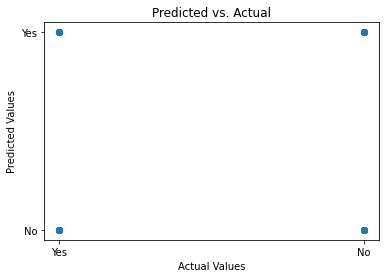

In [157]:
plt.scatter(y_test, y_pred, alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual')

# Display the plot
plt.show()

In [160]:
classification_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_report)


confusion_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_matrix)

Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.80      0.80      8200
         Yes       0.71      0.71      0.71      5800

    accuracy                           0.76     14000
   macro avg       0.76      0.75      0.75     14000
weighted avg       0.76      0.76      0.76     14000

Confusion Matrix:
[[6556 1644]
 [1685 4115]]


### Now Applying Decision Tree Classifier On The Data

In [161]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [176]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7622142857142857


In [174]:
from sklearn.metrics import classification_report, confusion_matrix

classification_report_DTC = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_report_DTC)

Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.80      0.80      8200
         Yes       0.71      0.71      0.71      5800

    accuracy                           0.76     14000
   macro avg       0.76      0.75      0.75     14000
weighted avg       0.76      0.76      0.76     14000



In [175]:
confusion_matrix_DTC = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_matrix_DTC)

Confusion Matrix:
[[6556 1644]
 [1685 4115]]


#### Case Study Of N_Hours_Playing

In [243]:
data_person = df_person_data
data_person

,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745
1,16f3bafb-9556-434e-adab-cb02f41fe32a,18.0,0,2,0,0,20.693273
2,0fa17eee-7214-4609-97fe-dd3093601800,28.0,0,3,0,0,22.412490
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,20.0,1,72,0,0,299.187025
4,51fed64a-375e-417f-94e4-4d27c368ea44,32.0,1,58,1,3,20.367141
...,...,...,...,...,...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,32.0,4,62,1,2,21.378288
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,36.0,0,53,1,1,3.707476
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,19.0,0,1,1,0,23.809075
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,31.0,2,49,3,2,15.708397


In [255]:

X = data_person.drop(['n_hours_playing','person_id','age'], axis=1)
y = data_person['n_hours_playing']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [256]:

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


LinearRegression()

In [257]:
y_pred = reg_model.predict(X_test)

In [259]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [260]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)


r2 = r2_score(y_test, y_pred)
print('R-squared (R2) Score:', r2)

Mean Squared Error (MSE): 9245.16572841422
Mean Absolute Error (MAE): 70.67279173350495
R-squared (R2) Score: 0.48092079731875814


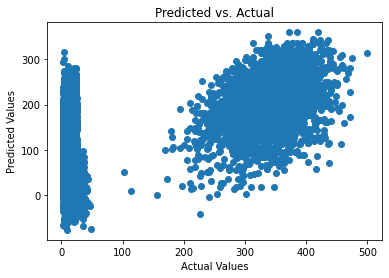

In [262]:

plt.scatter(y_test, y_pred)


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual')


plt.show()